In [127]:
pip install notebook jupyter pandas skimpy matplotlib seaborn scikit-learn --upgrade scikit-learn



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [128]:
import pandas as pd
import glob
from skimpy import skim

# Trouver tous les fichiers CSV dans le dossier data/
file_paths = glob.glob("../data/*.csv")

# Charger et fusionner les 6 fichiers CSV en un seul DataFrame
df_list = [pd.read_csv(file, delimiter=",", low_memory=False) for file in file_paths]
df = pd.concat(df_list, ignore_index=True)

# Afficher les premières lignes
print(f"Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")
df.head()

Le dataset contient 389881 lignes et 40 colonnes.


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2019-809289,2019-07-03,1,Vente,315000.0,72.0,NaN,RUE DU TEMPLE,9191,75003.0,...,Appartement,195.0,2.0,NaN,NaN,NaN,NaN,NaN,2.356539,48.861345
1,2019-809290,2019-07-01,1,Vente,1460000.0,34.0,NaN,RUE DE PENTHIEVRE,7237,75008.0,...,Appartement,115.0,5.0,NaN,NaN,NaN,NaN,NaN,2.313418,48.872688
2,2019-809290,2019-07-01,1,Vente,1460000.0,34.0,NaN,RUE DE PENTHIEVRE,7237,75008.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.313418,48.872688
3,2019-809291,2019-07-02,1,Vente,425000.0,19.0,NaN,RUE PIERRE LESCOT,7455,75001.0,...,Appartement,52.0,3.0,NaN,NaN,NaN,NaN,NaN,2.348739,48.863462
4,2019-809292,2019-07-02,1,Vente,230000.0,123.0,NaN,RUE SAINT HONORE,8635,75001.0,...,Appartement,16.0,1.0,NaN,NaN,NaN,NaN,NaN,2.341817,48.861395


In [129]:
# Vérifier les colonnes disponibles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389881 entries, 0 to 389880
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_mutation                   389881 non-null  object 
 1   date_mutation                 389881 non-null  object 
 2   numero_disposition            389881 non-null  int64  
 3   nature_mutation               389881 non-null  object 
 4   valeur_fonciere               385733 non-null  float64
 5   adresse_numero                388390 non-null  float64
 6   adresse_suffixe               17088 non-null   object 
 7   adresse_nom_voie              388448 non-null  object 
 8   adresse_code_voie             388448 non-null  object 
 9   code_postal                   388443 non-null  float64
 10  code_commune                  389881 non-null  int64  
 11  nom_commune                   389881 non-null  object 
 12  code_departement              389881 non-nul

In [130]:
# Sélection des colonnes pertinentes
df = df[["date_mutation", "valeur_fonciere", "code_postal", "type_local", "surface_reelle_bati", "nombre_pieces_principales"]]

# Suppresion des valeurs manquantes
df = df.dropna()

# Conversion de la date en format datetime
df["date_mutation"] = pd.to_datetime(df["date_mutation"], format="%Y-%m-%d")

# Ajout d'une colonne "prix au m²"
df["prix_m2"] = df["valeur_fonciere"] / df["surface_reelle_bati"]

#Vérification
print(f"Dataset après nettoyage : {df.shape[0]} lignes et {df.shape[1]} colonnes.")
df.head()

Dataset après nettoyage : 221914 lignes et 7 colonnes.


,date_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,prix_m2
0,2019-07-03,315000.0,75003.0,Appartement,195.0,2.0,1615.384615
1,2019-07-01,1460000.0,75008.0,Appartement,115.0,5.0,12695.652174
3,2019-07-02,425000.0,75001.0,Appartement,52.0,3.0,8173.076923
4,2019-07-02,230000.0,75001.0,Appartement,16.0,1.0,14375.000000
5,2019-07-05,850000.0,75003.0,Local industriel. commercial ou assimilé,41.0,0.0,20731.707317


In [131]:
# Description des stats du prix au m²
df["prix_m2"].describe()

count    2.219140e+05
mean     9.924801e+04
std      9.136841e+05
min      4.901961e-04
25%      8.947368e+03
50%      1.107143e+04
75%      1.485714e+04
max      1.489216e+08
Name: prix_m2, dtype: float64

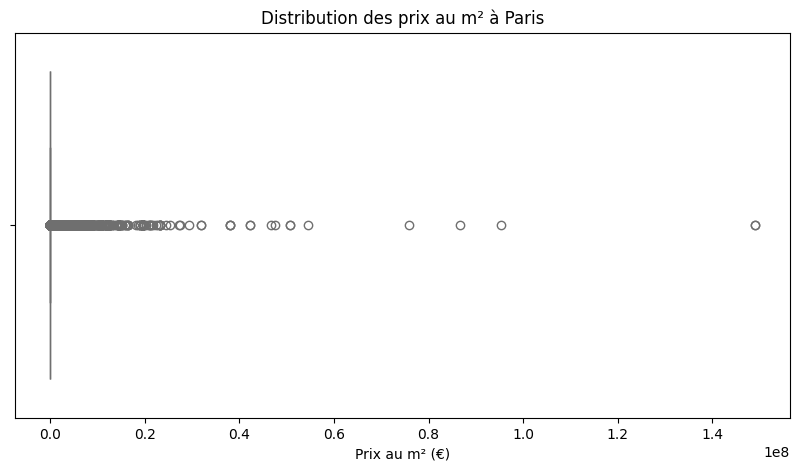

In [132]:
#Visualisation des outliers avec un boxplot
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot des prix au m²
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["prix_m2"], color="skyblue")

#Affichage
plt.xlabel("Prix au m² (€)")
plt.title("Distribution des prix au m² à Paris")
plt.show()


In [133]:
#Détection des outliers avec l’intervalle interquartile
# Calcul des quartiles
Q1 = df["prix_m2"].quantile(0.25)
Q3 = df["prix_m2"].quantile(0.75)
IQR = Q3 - Q1  # Intervalle interquartile

# Définition des bornes pour détecter les outliers
borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

print(f"Borne inférieure : {borne_inf:.2f} €")
print(f"Borne supérieure : {borne_sup:.2f} €")

#Filtrage des outliers
# Suppression des outliers
df_clean = df[(df["prix_m2"] >= borne_inf) & (df["prix_m2"] <= borne_sup)]

Borne inférieure : 82.71 €
Borne supérieure : 23721.80 €


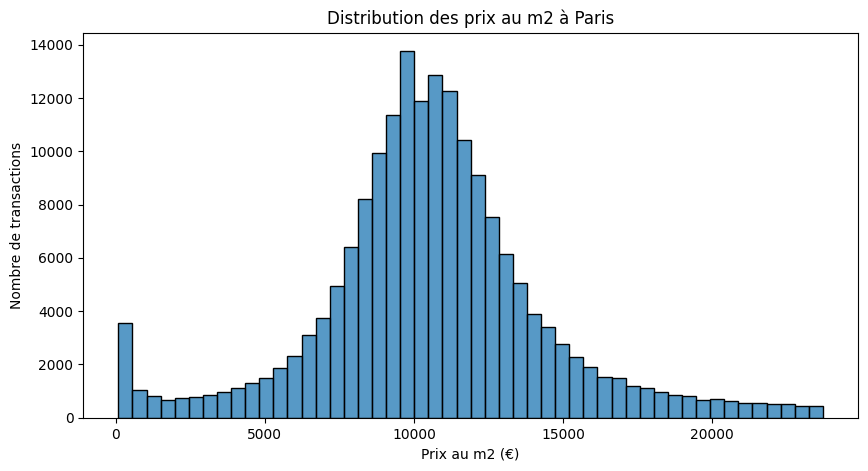

In [134]:
#Histogramme des prix au m2
plt.figure(figsize=(10,5))

#Histogramme des prix au m²
sns.histplot(df_clean["prix_m2"], bins=50)
plt.xlabel("Prix au m2 (€)")
plt.ylabel("Nombre de transactions")
plt.title("Distribution des prix au m2 à Paris")
plt.show()

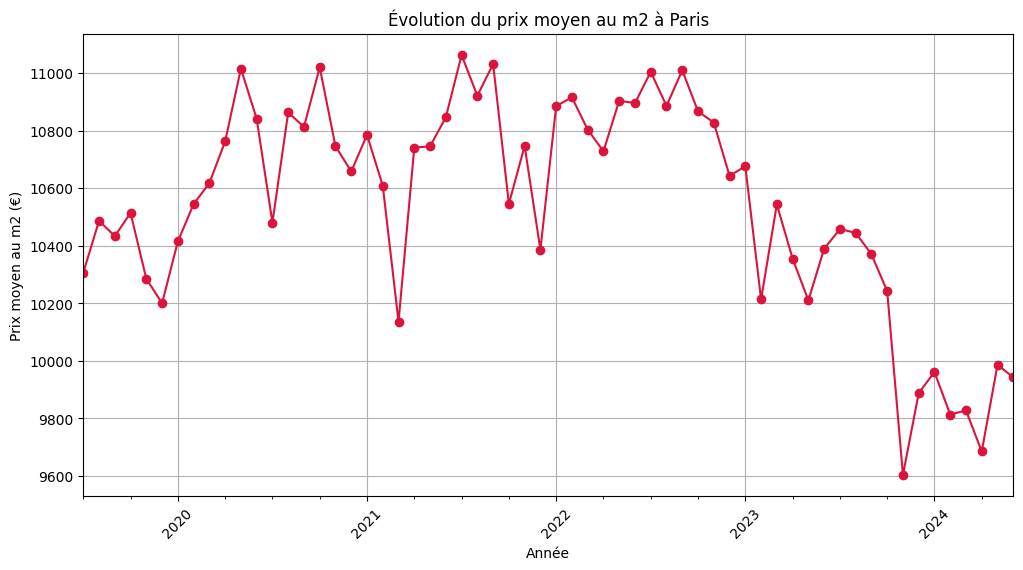

In [135]:
#Evolution des prix dans le temps
#Calcul du prix moyen par mois
df_time = df_clean.groupby(df_clean["date_mutation"].dt.to_period("M"))["prix_m2"].mean()

#Affichage de l'évolution
plt.figure(figsize=(12,6))
df_time.plot(marker="o", linestyle="-", color="crimson")
plt.xlabel("Année")
plt.ylabel("Prix moyen au m2 (€)")
plt.title("Évolution du prix moyen au m2 à Paris")
plt.xticks(rotation=45)
plt.grid()
plt.show()


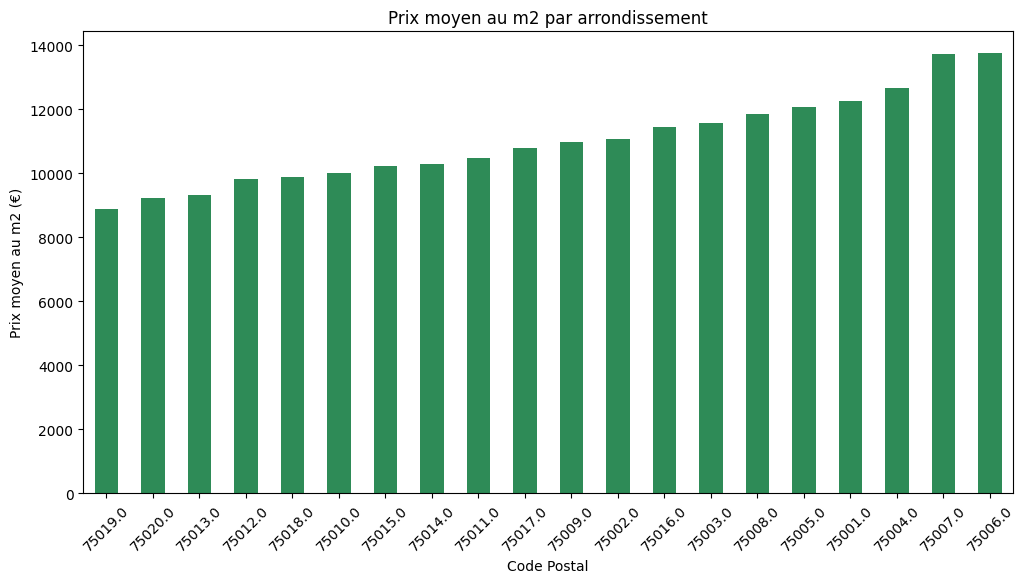

In [136]:
#Prix au m2 par arrondissement
#Moyenne des prix par arrondissement
df_postal = df_clean.groupby("code_postal")["prix_m2"].mean().sort_values()

#Affichage
plt.figure(figsize=(12,6))
df_postal.plot(kind="bar", color="seagreen")
plt.xlabel("Code Postal")
plt.ylabel("Prix moyen au m2 (€)")
plt.title("Prix moyen au m2 par arrondissement")
plt.xticks(rotation=45)
plt.show()

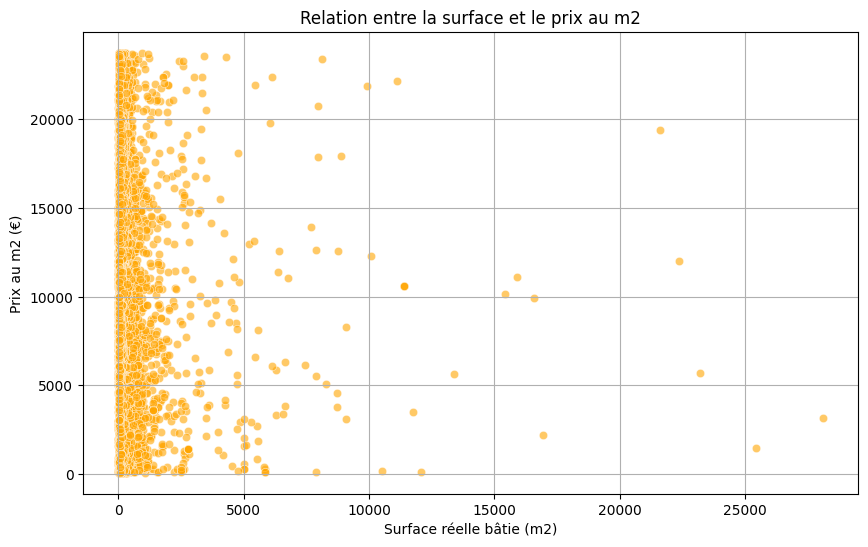

In [137]:
#Relation entre la surfaceet le prix au m2
plt.figure(figsize=(10, 6))

#Scatter plot : Prix au m² en fonction de la surface
sns.scatterplot(x="surface_reelle_bati", y="prix_m2", data=df_clean, color="orange", alpha=0.6)
plt.xlabel("Surface réelle bâtie (m2)")
plt.ylabel("Prix au m2 (€)")
plt.title("Relation entre la surface et le prix au m2")
plt.grid(True)
plt.show()

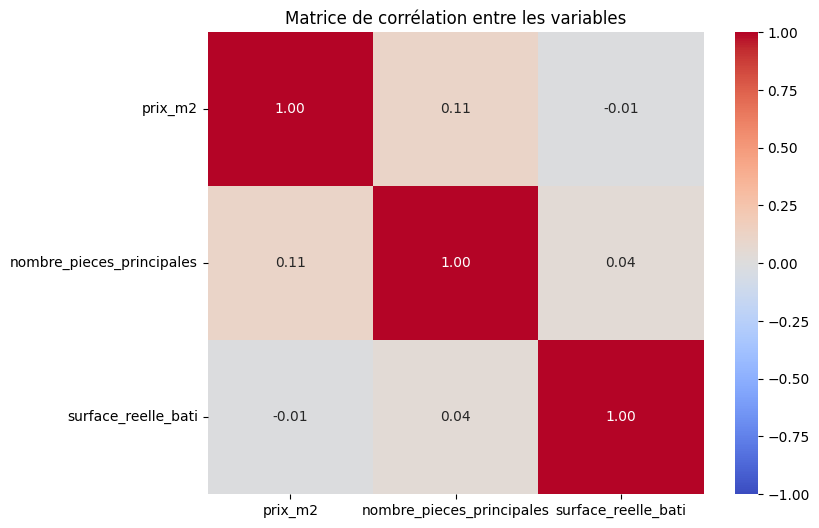

In [138]:
#Calcul de la matrice de corrélation prix/nb/pièces/surface
corr = df_clean[["prix_m2", "nombre_pieces_principales", "surface_reelle_bati"]].corr()

#Affichage sous forme de heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de corrélation entre les variables")
plt.show()


La corrélation est faible ce qui peut indiquer que d'autres facteurs (localisation, type de bien, etc.) influencent beaucoup plus le prix au m² que la surface ou le nombre de pièces. 
À ce moment-là, l'idée serait d'intégrer ces variables dans un modèle prédictif, comme un modèle de régression ou un modèle machine learning.

/var/folders/xr/c0gqnn_54y17476dwww_7bs40000gn/T/ipykernel_5967/1417655697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['année_mutation'] = df_clean['date_mutation'].dt.year


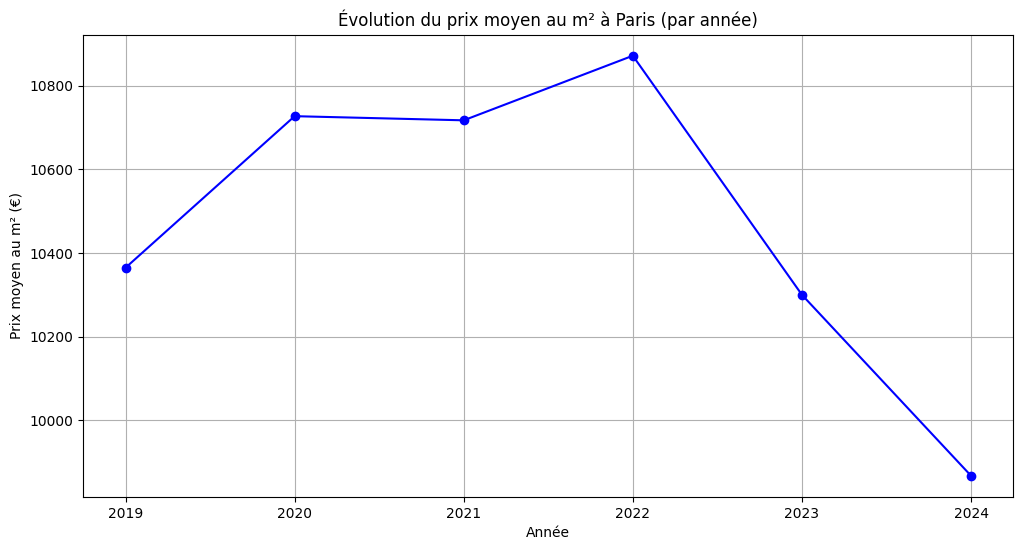

In [139]:
#Corrélation avec l'Année de la transaction
#Extraire l'année de mutation
df_clean['année_mutation'] = df_clean['date_mutation'].dt.year

#Moyenne des prix au m² par année
df_yearly = df_clean.groupby("année_mutation")["prix_m2"].mean()

# Visualisation
plt.figure(figsize=(12,6))
df_yearly.plot(marker="o", linestyle="-", color="blue")
plt.xlabel("Année")
plt.ylabel("Prix moyen au m² (€)")
plt.title("Évolution du prix moyen au m² à Paris (par année)")
plt.grid(True)
plt.show()

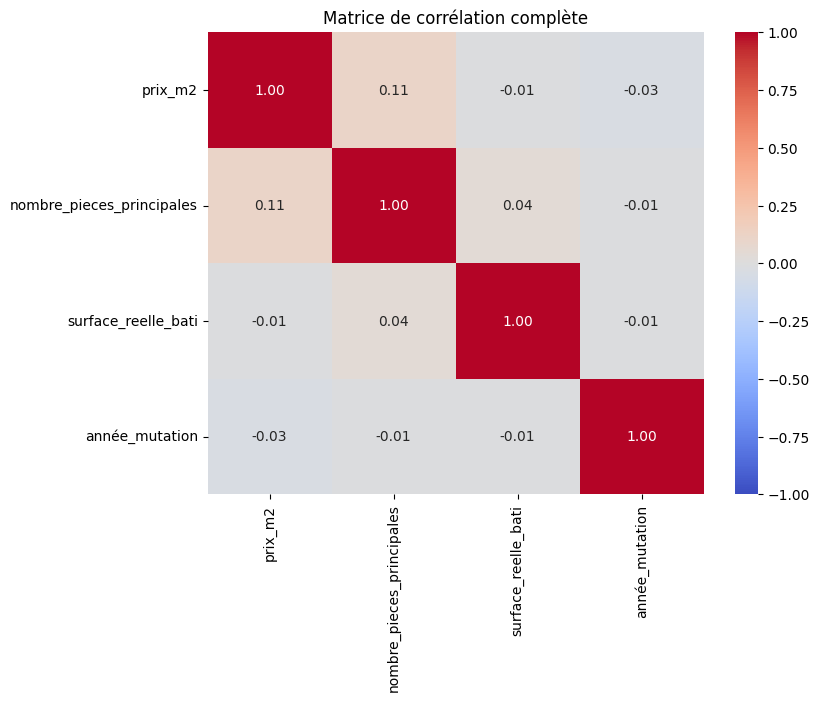

In [140]:
#Matrice de corrélation full
#Calcul de la matrice de corrélation pour toutes les variables numériques
corr_full = df_clean[["prix_m2", "nombre_pieces_principales", "surface_reelle_bati", "année_mutation"]].corr()

#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_full, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de corrélation complète")
plt.show()

Objectif : Créer un modèle de régression qui prédit le prix au m² en fonction de plusieurs variables.

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Sélectionner les variables explicatives et la cible
X = df_clean[["date_mutation", "code_postal", "type_local", "surface_reelle_bati", "nombre_pieces_principales"]]  # Features
y = df_clean["prix_m2"]  # Target

# Convertir "date_mutation" en années uniquement si c'est une date
X['date_mutation'] = pd.to_datetime(X['date_mutation'], errors='coerce').dt.year

# Encoder les variables catégorielles 'code_postal' et 'type_local'
X_encoded = pd.get_dummies(X, drop_first=True)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Faire des prédictions
y_pred = model.predict(X_test_scaled)

# Évaluer les performances
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Affichage des résultats
print(f"Erreur Absolue Moyenne (MAE) : {mae:.2f} €")
print(f"Erreur Quadratique Moyenne (RMSE) : {rmse:.2f} €")

Erreur Absolue Moyenne (MAE) : 2625.29 €
Erreur Quadratique Moyenne (RMSE) : 3769.28 €


/var/folders/xr/c0gqnn_54y17476dwww_7bs40000gn/T/ipykernel_5967/37239885.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date_mutation'] = pd.to_datetime(X['date_mutation'], errors='coerce').dt.year


DONNEES POUR TESTER

In [148]:
# Prédire le prix d'un nouveau bien immobilier avec ces critères
new_data = {
    "date_mutation": [2023],  # Année de la transaction
    "code_postal": [75020],  # Code Postal
    "type_local": ['Appartement'],  # Type de bien
    "surface_reelle_bati": [65],  # Surface en m²
    "nombre_pieces_principales": [3]  # Nb de pièces
}

# Convertir en DataFrame
new_data_df = pd.DataFrame(new_data)

# Convertir "date_mutation" en année
new_data_df['date_mutation'] = pd.to_datetime(new_data_df['date_mutation'], errors='coerce').dt.year

# Encoder les nouvelles données
new_data_encoded = pd.get_dummies(new_data_df, drop_first=True)

# Réindexer pour correspondre aux colonnes d'entraînement
new_data_encoded = new_data_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Normaliser les nouvelles données
new_data_scaled = scaler.transform(new_data_encoded)

# Faire la prédiction
predicted_price = model.predict(new_data_scaled)

# Afficher le prix prédit au m2
print(f"Le prix prédit au m2 pour ce bien immobilier est : {predicted_price[0]:.2f} €")

# Calculer le prix total en multipliant le prix au mm2 par la surface réelle bâtie
predicted_total_price = predicted_price[0] * new_data["surface_reelle_bati"][0]

# Afficher le prix total estimé
print(f"Le prix estimé du bien immobilier est : {predicted_total_price:.2f} €")

Le prix prédit au m2 pour ce bien immobilier est : 14688.22 €
Le prix estimé du bien immobilier est : 954734.30 €
